# Diabete Disease Predicition

# 1 Get Data                             
# 2 preprocessing data
# 3 Train test split
# 4 Train and evualivate Model
# 5 Create Website

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# 1 Get Data

In [2]:
diabete_df = pd.read_csv('diabetes.csv')
diabete_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2 Proprocess Data

In [3]:
diabete_df.shape

(768, 9)

In [4]:
diabete_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
diabete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabete_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabete_df.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [21]:
diabete_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [58]:
diabete_df["Age"].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [59]:
diabete_df["Age"].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

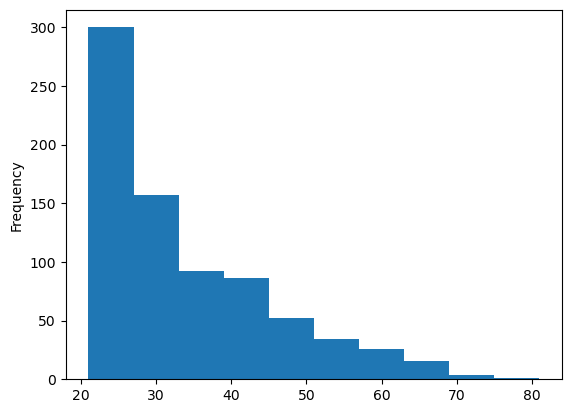

In [60]:
diabete_df["Age"].plot(kind="hist")

In [61]:
diabete_df["Age"].isnull().sum()

0

<Axes: >

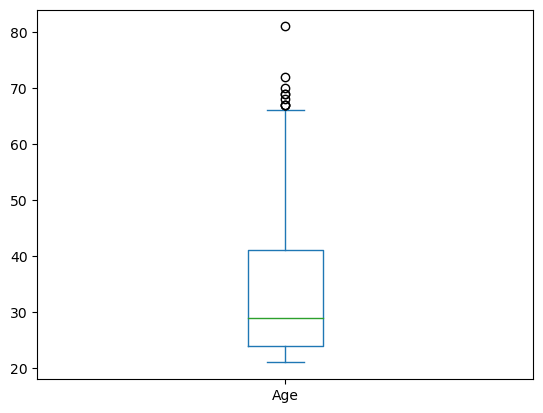

In [62]:
diabete_df["Age"].plot(kind="box")

In [53]:
diabete_df["Insulin"].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [54]:
diabete_df["Insulin"].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

<Axes: ylabel='Frequency'>

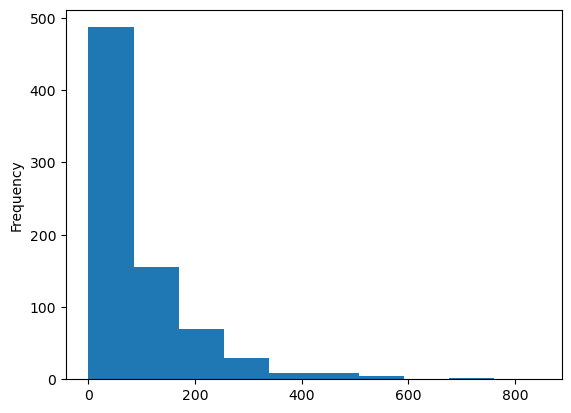

In [55]:
diabete_df["Insulin"].plot(kind="hist")

In [56]:
diabete_df["Insulin"].isnull().sum()

0

<Axes: >

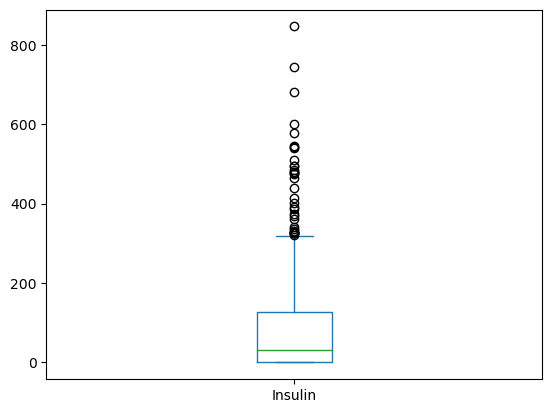

In [57]:
diabete_df["Insulin"].plot(kind="box")

In [48]:
diabete_df["SkinThickness"].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [49]:
diabete_df["SkinThickness"].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

<Axes: ylabel='Frequency'>

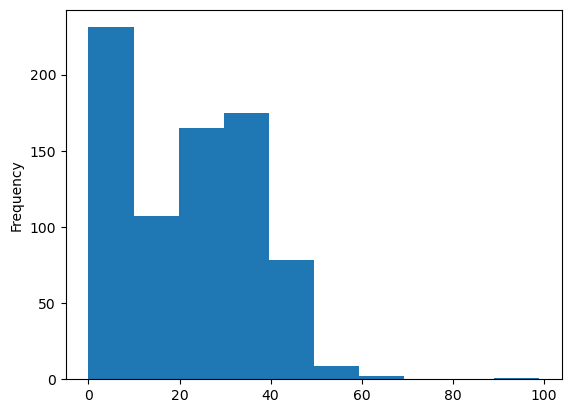

In [50]:
diabete_df["SkinThickness"].plot(kind="hist")

In [51]:
diabete_df["SkinThickness"].isnull().sum()

0

<Axes: >

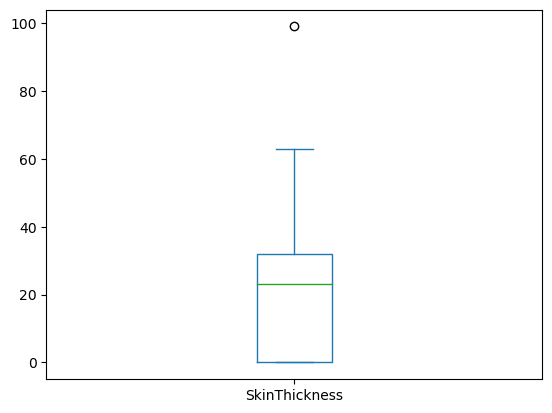

In [52]:
diabete_df["SkinThickness"].plot(kind="box")

In [43]:
diabete_df["BloodPressure"].value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

In [44]:
diabete_df["BloodPressure"].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

<Axes: ylabel='Frequency'>

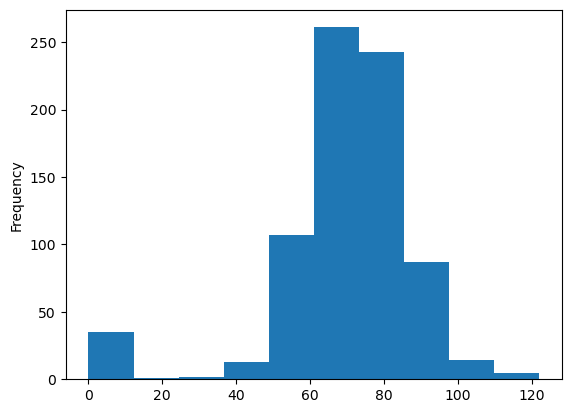

In [45]:
diabete_df["BloodPressure"].plot(kind="hist")

In [46]:
diabete_df["BloodPressure"].isnull().sum()

0

<Axes: >

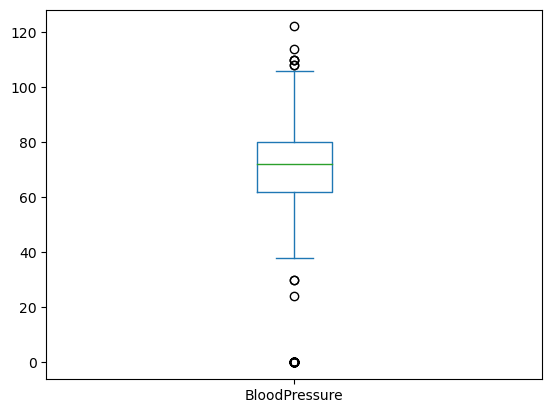

In [47]:
diabete_df["BloodPressure"].plot(kind="box")

In [37]:
diabete_df["Glucose"].value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [38]:
diabete_df["Glucose"].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

<Axes: ylabel='Frequency'>

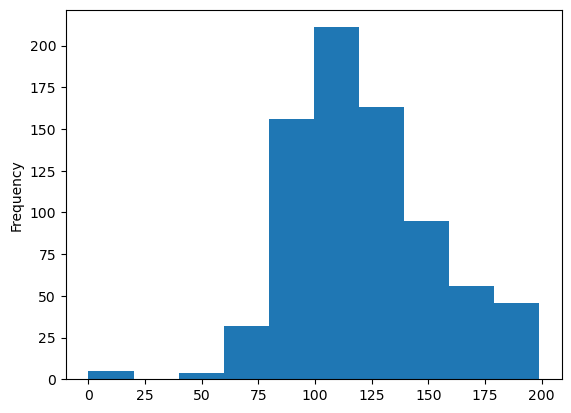

In [40]:
diabete_df["Glucose"].plot(kind="hist")

In [41]:
diabete_df["Glucose"].isnull().sum()

0

<Axes: >

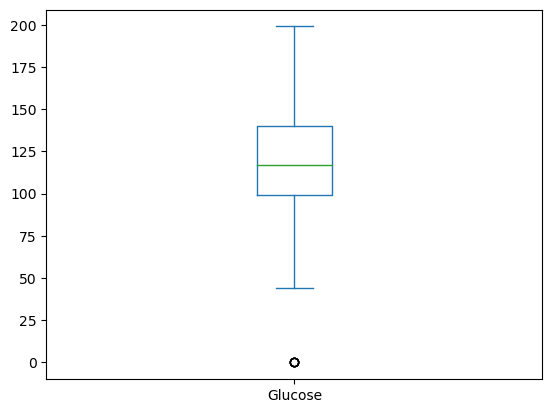

In [42]:
diabete_df["Glucose"].plot(kind="box")

In [29]:
diabete_df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [30]:
diabete_df["Pregnancies"].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

<Axes: ylabel='Frequency'>

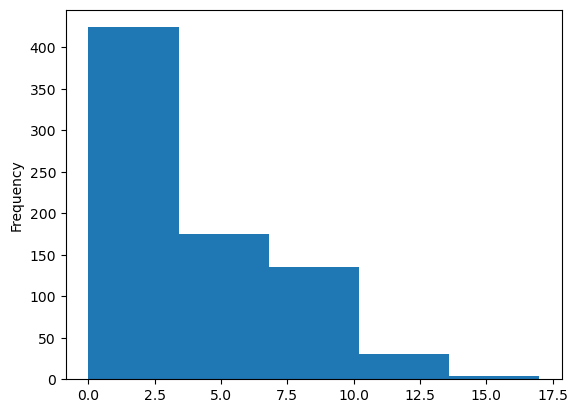

In [33]:
diabete_df["Pregnancies"].plot(kind="hist",bins=5)

In [34]:
diabete_df["Pregnancies"].isnull().sum()

0

<Axes: >

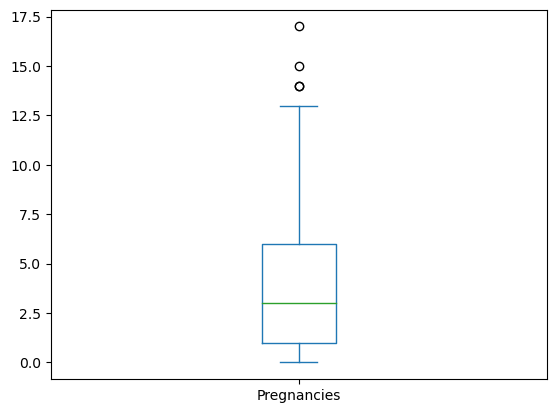

In [36]:
diabete_df["Pregnancies"].plot(kind="box")

In [24]:
diabete_df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [26]:
diabete_df["Outcome"].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

<Axes: ylabel='Frequency'>

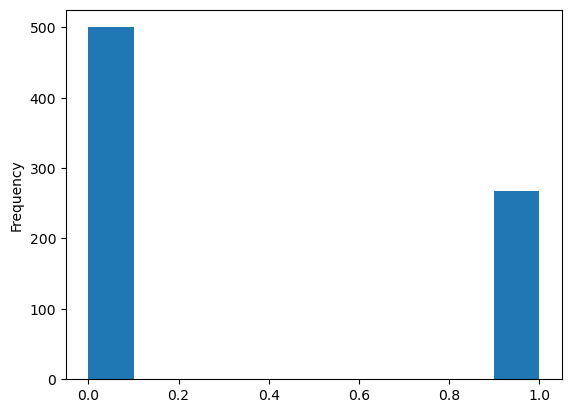

In [27]:
diabete_df["Outcome"].plot(kind="hist")

In [28]:
diabete_df["Outcome"].isnull().sum()

0

# 3 Separate Dependent & Independ Feature into x and y

In [8]:
X = diabete_df.drop('Outcome',axis=1)
y = diabete_df['Outcome']

In [9]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# 5 Standarization

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
Standard_data = scaler.fit_transform(X)
X = Standard_data

In [12]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# 4 Train test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=1)

# 6 Train Model

In [14]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [15]:
model = svm.SVC(kernel='linear')

In [16]:
lg.fit(X_train,y_train)

LogisticRegression()

In [17]:
train_y_pred = lg.predict(X_train)
test_y_pred = lg.predict(X_test)

# Accuracy

In [18]:
print('Train set Accuracy :',accuracy_score(train_y_pred,y_train))
print('Test set Accuracy :',accuracy_score(test_y_pred,y_test))

Train set Accuracy : 0.7792732166890982
Test set Accuracy : 0.84


# Prediction System

In [19]:
input_data = (1,85,66,29,0,26.6,0.351,31)
input_data_nparray = np.asarray(input_data)
reshaped_input_data = input_data_nparray.reshape(1,-1)
prediction = model.predict(reshaped_input_data)

if prediction == 1:
    print('this person has a diabetes')
else:
    print("this person has not diabetes")

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
diabete_df.head(100)